In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Datos de Estadísticas de Pokemón

Este dataset consiste en estadísticas de distintos pokemones. Tales como:
- Nombre.
- Tipo de Pokemón.
- Puntaje Total.
- Puntaje de Vida.
- Puntaje de Velocidad.
- Puntaje de Ataque.
- Etc.

Consiste principalmente en las estadísticas de los pokemones.



In [3]:
#Importamos el dataset

data = pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


En este caso, nos interesa saber sí los puntos de Ataque, tiene alguna conexión en función de su defensa. 
> Usando el método de mínimos cuadrados, podemos crear distintos modelos, en este caso solo nos concentraremos en modelos polinomicos.

$$f(x; w_0, w_1, \dots)= w_0 + w_1 x + w_2 x² + \dots$$ 

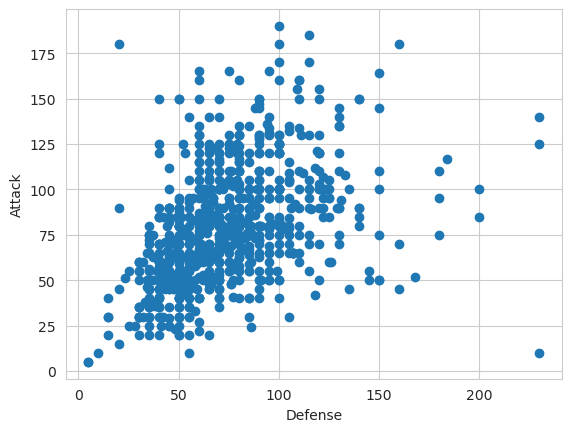

In [36]:
attack = data['Attack'].to_numpy() #Convertimos en un array de numpy los datos
defense = data['Defense'].to_numpy()

plt.scatter(defense, attack)
plt.xlabel('Defense')
plt.ylabel('Attack');

Usando el código visto en clase

In [34]:
def w_mat(x, y, n=1):
    
    #Generamos los datos para matriz X, dependiendo del orden de polinomio que necesitemos
    datax = [x**(i) for i in range(n+1)]
    
    X = np.vstack(datax).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    W = np.matmul(invXX, Xt)
    
    return W

w0, w1 = w_mat(defense, attack)

x_aux = np.linspace(np.min(defense), np.max(defense), 250)

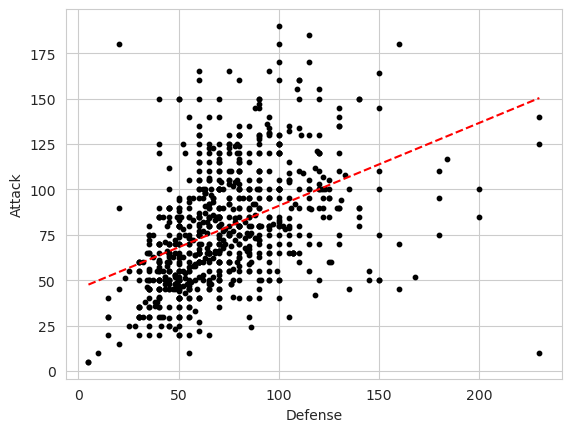

In [40]:
plt.scatter(defense, attack, color = 'black', s = 10)
plt.plot(x_aux, w0 + w1*x_aux, 'r--')
plt.xlabel('Defense')
plt.ylabel('Attack');

Observamos que no tiene un comportamiento lineal ahora probamos, con más términos

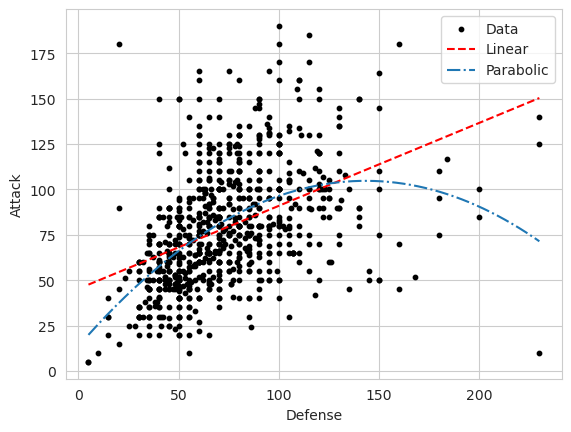

In [55]:
n_2 = w_mat(defense, attack, n=2)
a, b, c = n_2

f = lambda a,b,c,x: a + b*x+ c*x**2



plt.scatter(defense, attack, color = 'black', s = 10, label = 'Data')
plt.plot(x_aux, w0 + w1*x_aux, 'r--', label = 'Linear')
plt.plot(x_aux, f(a, b, c, x_aux), '-.', label = 'Parabolic')
plt.legend()
plt.xlabel('Defense')
plt.ylabel('Attack');

Si aplicamos por último un modelo cubico

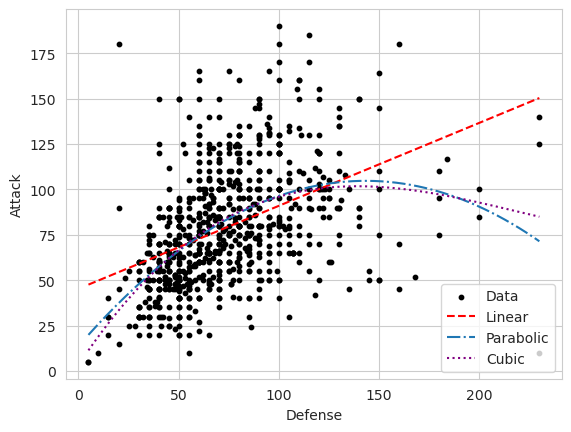

In [59]:
a1, a2, a3, a4 = w_mat(defense, attack, n=3)

f1 = lambda a, b, c, d, x: a + b*x + c*x**2 + d*x**3

plt.scatter(defense, attack, color = 'black', s = 10, label = 'Data')
plt.plot(x_aux, w0 + w1*x_aux, 'r--', label = 'Linear')
plt.plot(x_aux, f(a, b, c, x_aux), '-.', label = 'Parabolic')
plt.plot(x_aux, f1(a1, a2, a3, a4, x_aux), ':',color = 'purple', label = 'Cubic')
plt.legend()
plt.xlabel('Defense')
plt.ylabel('Attack');

Si intentamos predecir esto con un exponencial.

$$f(x; w0, w1) = w0 + w1 \exp({ax})$$

fijando $a = -1/100$

Reescribmos la función w_mat


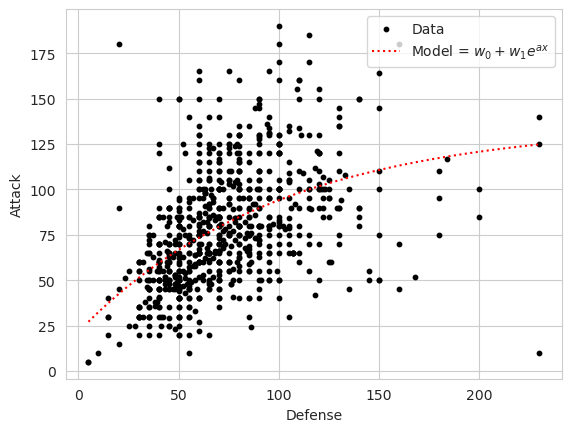

In [102]:
def w_mat(x, y):
    
    #Generamos los datos para matriz X, dependiendo del orden de polinomio que necesitemos
    datax = [np.ones_like(x), np.exp(-x/100)]
    
    X = np.vstack(datax).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    W = np.matmul(invXX, Xt)
    
    return W

b1, b2 = w_mat(defense, attack)

j = lambda x: b1 + b2*np.exp(-x/100)

plt.scatter(defense, attack, color = 'black', s = 10, label = 'Data')
plt.plot(x_aux, j(x_aux), ':', color = 'red', label = r'Model = $w_0 + w_1 e^{ax}$')
plt.legend()
plt.xlabel('Defense')
plt.ylabel('Attack');


#